In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
train_set = torchvision.datasets.CIFAR10(root='dataset/CIFAR10',train=True,transform=transforms.ToTensor(),download=True)
test_set = torchvision.datasets.CIFAR10(root='dataset/CIFAR10',train=False,transform=transforms.ToTensor(),download=True)


Extracting dataset/CIFAR10/cifar-10-python.tar.gz to dataset/CIFAR10
Files already downloaded and verified


In [4]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=10)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=10)

labels: tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3])


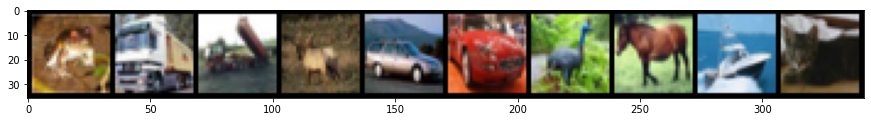

In [ ]:
batch = next(iter(train_loader))
images, labels = batch

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

print('labels:',labels)

In [18]:
class Network_a(nn.Module):
    def __init__(self):
        super(Network_a,self).__init__()
        self.ZeroPadding = nn.ZeroPad2d(2) # 3*32*32 --> 3*36*36
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5) # 3*36*36 --> 16*32 * 32
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #inp img size = 16*32*32 --> 16*16*16
        self.fc1 = nn.Linear(in_features=16*16*16,out_features=10)
    
    def forward(self,x):
        x = self.ZeroPadding(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = x.reshape(-1,16*16*16)
        x = self.fc1(x)
        return x

In [19]:
network_a = Network_a()
network_a.to(device)

optimizer_a = optim.SGD(network_a.parameters(),lr=0.001)

In [9]:
summary(network_a,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2           [-1, 16, 32, 32]           1,216
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Linear-4                   [-1, 10]          40,970
Total params: 42,186
Trainable params: 42,186
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 0.16
Estimated Total Size (MB): 0.36
----------------------------------------------------------------


In [20]:
network_a_loss = []
network_a_accuracy = []
for epoch in range(50):
    total_loss = 0.0
    for batch in train_loader:
        images, labels = batch[0].to(device),batch[1].to(device)
        
        preds = network_a(images)
        loss = F.cross_entropy(preds,labels)
        
        optimizer_a.zero_grad()
        loss.backward()
        optimizer_a.step()
        
        total_loss += loss.item()
    network_a_loss.append(total_loss)

    total = 0
    correct = 0
    for data in test_loader:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = network_a(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    network_a_accuracy.append(correct/total)
    print("epoch: ",epoch,"loss: ",total_loss,"accuracy: ",correct/total)

epoch:  0 loss:  10143.524262666702 accuracy:  0.3488
epoch:  1 loss:  9024.534046411514 accuracy:  0.3984
epoch:  2 loss:  8428.003228127956 accuracy:  0.4396
epoch:  3 loss:  7945.479939877987 accuracy:  0.4643
epoch:  4 loss:  7579.480915129185 accuracy:  0.4834
epoch:  5 loss:  7287.754836320877 accuracy:  0.4961
epoch:  6 loss:  7053.743946433067 accuracy:  0.5055
epoch:  7 loss:  6870.145074903965 accuracy:  0.5142
epoch:  8 loss:  6724.733327686787 accuracy:  0.5225
epoch:  9 loss:  6605.815258979797 accuracy:  0.5297
epoch:  10 loss:  6504.984207600355 accuracy:  0.5359
epoch:  11 loss:  6416.232217520475 accuracy:  0.5406
epoch:  12 loss:  6335.549308389425 accuracy:  0.5457
epoch:  13 loss:  6260.212398082018 accuracy:  0.5504
epoch:  14 loss:  6188.480488240719 accuracy:  0.5549
epoch:  15 loss:  6118.891175150871 accuracy:  0.5588
epoch:  16 loss:  6050.757021129131 accuracy:  0.5637
epoch:  17 loss:  5984.137887716293 accuracy:  0.5688
epoch:  18 loss:  5918.95281624794 ac

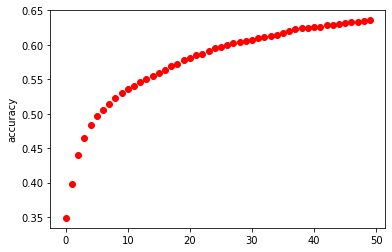

best accuracy is :  0.6358


In [22]:
plt.plot(network_a_accuracy,'ro')
plt.ylabel('accuracy')
plt.show()
print("best accuracy is : ",network_a_accuracy[-1])

# Part b Two Dense Layers


In [25]:
class Network_b(nn.Module):
    def __init__(self):
        super(Network_b,self).__init__()
        self.ZeroPadding = nn.ZeroPad2d(2) # 3*32*32 --> 3*36*36
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5) # 3*36*36 --> 16*32 * 32
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2) #inp img size = 16*32*32 --> 16*16*16
        self.fc1 = nn.Linear(in_features=16*16*16,out_features=64)
        self.fc2 = nn.Linear(in_features=64,out_features=10)
    
    def forward(self,x):
        x = self.ZeroPadding(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = x.reshape(-1,16*16*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [28]:
network_b = Network_b()
network_b.to(device)

optimizer_b = optim.SGD(network_b.parameters(),lr=0.001)

In [27]:
summary(network_b,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2           [-1, 16, 32, 32]           1,216
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Linear-4                   [-1, 64]         262,208
            Linear-5                   [-1, 10]             650
Total params: 264,074
Trainable params: 264,074
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 1.01
Estimated Total Size (MB): 1.21
----------------------------------------------------------------


In [29]:
network_b_loss = []
network_b_accuracy = []
for epoch in range(50):
    total_loss = 0.0
    for batch in train_loader:
        images, labels = batch[0].to(device),batch[1].to(device)
        
        preds = network_b(images)
        loss = F.cross_entropy(preds,labels)
        
        optimizer_b.zero_grad()
        loss.backward()
        optimizer_b.step()
        
        total_loss += loss.item()
    network_b_loss.append(total_loss)

    total = 0
    correct = 0
    for data in test_loader:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = network_b(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    network_b_accuracy.append(correct/total)
    print("epoch: ",epoch,"loss: ",total_loss,"accuracy: ",correct/total)

epoch:  0 loss:  10663.26126742363 accuracy:  0.2996
epoch:  1 loss:  9491.174120903015 accuracy:  0.3549
epoch:  2 loss:  9022.75313782692 accuracy:  0.3895
epoch:  3 loss:  8594.934719920158 accuracy:  0.4176
epoch:  4 loss:  8149.773177206516 accuracy:  0.4431
epoch:  5 loss:  7709.681609749794 accuracy:  0.4674
epoch:  6 loss:  7325.004394590855 accuracy:  0.4847
epoch:  7 loss:  7035.926534295082 accuracy:  0.4992
epoch:  8 loss:  6831.186703085899 accuracy:  0.5117
epoch:  9 loss:  6676.400048881769 accuracy:  0.5192
epoch:  10 loss:  6546.370855033398 accuracy:  0.5291
epoch:  11 loss:  6429.89191955328 accuracy:  0.5365
epoch:  12 loss:  6322.569455891848 accuracy:  0.5434
epoch:  13 loss:  6222.2374693751335 accuracy:  0.5506
epoch:  14 loss:  6127.662476539612 accuracy:  0.5546
epoch:  15 loss:  6039.511366307735 accuracy:  0.5593
epoch:  16 loss:  5955.173723727465 accuracy:  0.5658
epoch:  17 loss:  5874.293478161097 accuracy:  0.5735
epoch:  18 loss:  5798.3074833750725 ac

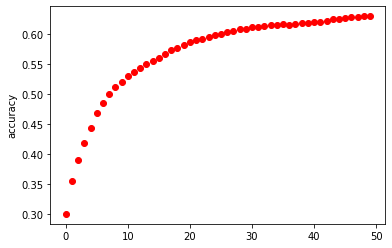

best accuracy is :  0.6291


In [30]:
plt.plot(network_b_accuracy,'ro')
plt.ylabel('accuracy')
plt.show()
print("best accuracy is : ",network_b_accuracy[-1])

# Part c 2blocks of Conv2D -> BatchNorm2D->MaxPooling2D->Two Dense Layers



In [31]:
class Network_c(nn.Module):
    def __init__(self):
        super(Network_c,self).__init__()
        self.ZeroPadding = nn.ZeroPad2d(2) # 3*32*32 --> 3*36*36
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5) # 3*36*36 --> 6*32 * 32
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5) # 6*32*32 --> 16*28*28
        self.batch = nn.BatchNorm2d(16) # 16*28*28
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2) # 16*28*28 --> 16*14*14
        self.fc1 = nn.Linear(in_features=16*14*14,out_features=64)
        self.fc2 = nn.Linear(in_features=64,out_features=10)
    
    def forward(self,x):
        x = self.ZeroPadding(x)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(self.batch(x))
        x = x.reshape(-1,16*14*14)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [34]:
network_c = Network_c()
network_c.to(device)

optimizer_c = optim.SGD(network_c.parameters(),lr=0.001)

In [33]:
summary(network_c,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2            [-1, 6, 32, 32]             456
            Conv2d-3           [-1, 16, 28, 28]           2,416
       BatchNorm2d-4           [-1, 16, 28, 28]              32
         MaxPool2d-5           [-1, 16, 14, 14]               0
            Linear-6                   [-1, 64]         200,768
            Linear-7                   [-1, 10]             650
Total params: 204,322
Trainable params: 204,322
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.29
Params size (MB): 0.78
Estimated Total Size (MB): 1.08
----------------------------------------------------------------


In [35]:
network_c_loss = []
network_c_accuracy = []
for epoch in range(50):
    total_loss = 0.0
    for batch in train_loader:
        images, labels = batch[0].to(device),batch[1].to(device)
        
        preds = network_c(images)
        loss = F.cross_entropy(preds,labels)
        
        optimizer_c.zero_grad()
        loss.backward()
        optimizer_c.step()
        
        total_loss += loss.item()
    network_c_loss.append(total_loss)

    total = 0
    correct = 0
    for data in test_loader:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = network_c(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    network_c_accuracy.append(correct/total)
    print("epoch: ",epoch,"loss: ",total_loss,"accuracy: ",correct/total)

epoch:  0 loss:  8298.627646446228 accuracy:  0.4854
epoch:  1 loss:  6585.223675698042 accuracy:  0.5659
epoch:  2 loss:  5789.829888790846 accuracy:  0.5966
epoch:  3 loss:  5316.813221305609 accuracy:  0.6132
epoch:  4 loss:  4991.981818974018 accuracy:  0.6217
epoch:  5 loss:  4726.881024450064 accuracy:  0.6265
epoch:  6 loss:  4492.071783170104 accuracy:  0.6295
epoch:  7 loss:  4271.816046759486 accuracy:  0.6318
epoch:  8 loss:  4062.819400936365 accuracy:  0.6332
epoch:  9 loss:  3852.7081771194935 accuracy:  0.6312
epoch:  10 loss:  3647.5234916582704 accuracy:  0.6304
epoch:  11 loss:  3444.7133050709963 accuracy:  0.6323
epoch:  12 loss:  3244.6249638423324 accuracy:  0.6304
epoch:  13 loss:  3040.599687360227 accuracy:  0.6278
epoch:  14 loss:  2837.3725553117692 accuracy:  0.6269
epoch:  15 loss:  2635.8640216626227 accuracy:  0.6238
epoch:  16 loss:  2435.8103961460292 accuracy:  0.623
epoch:  17 loss:  2240.4722421504557 accuracy:  0.6208
epoch:  18 loss:  2044.14894992

KeyboardInterrupt: ignored

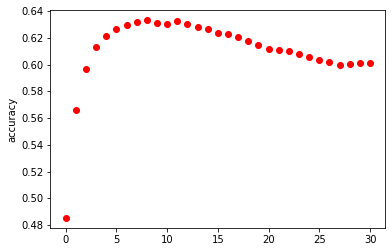

In [49]:
plt.plot(network_c_accuracy,'ro')
plt.ylabel('accuracy')
plt.show()

 - As we can see from above graph we are overfitting the model, as the accuracy on test data started decreasing
 - Hence we should stop at epoch = 8 with accuracy as  0.6332

# Part d 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D->Two Dense Layers



In [42]:
class Network_d(nn.Module):
    def __init__(self):
        super(Network_d,self).__init__()
        self.ZeroPadding = nn.ZeroPad2d(2) # 3*32*32 --> 3*36*36
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5) # 3*36*36 --> 6*32 * 32
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5) # 6*32*32 --> 16*28*28
        self.conv3 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5) # 16*28*28 --> 32*24*24
        self.batch = nn.BatchNorm2d(32) # 32*24*24
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2) # 32*24*24 --> 32*12*12
        self.fc1 = nn.Linear(in_features=32*12*12,out_features=64)
        self.fc2 = nn.Linear(in_features=64,out_features=10)
    
    def forward(self,x):
        x = self.ZeroPadding(x)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(self.batch(x))
        x = x.reshape(-1,32*12*12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [43]:
network_d = Network_d()
network_d.to(device)

optimizer_d = optim.SGD(network_d.parameters(),lr=0.001)

In [44]:
summary(network_d,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1            [-1, 3, 36, 36]               0
            Conv2d-2            [-1, 6, 32, 32]             456
            Conv2d-3           [-1, 16, 28, 28]           2,416
            Conv2d-4           [-1, 32, 24, 24]          12,832
       BatchNorm2d-5           [-1, 32, 24, 24]              64
         MaxPool2d-6           [-1, 32, 12, 12]               0
            Linear-7                   [-1, 64]         294,976
            Linear-8                   [-1, 10]             650
Total params: 311,394
Trainable params: 311,394
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.49
Params size (MB): 1.19
Estimated Total Size (MB): 1.69
----------------------------------------------------------------


In [45]:
network_d_loss = []
network_d_accuracy = []
for epoch in range(50):
    total_loss = 0.0
    for batch in train_loader:
        images, labels = batch[0].to(device),batch[1].to(device)
        
        preds = network_d(images)
        loss = F.cross_entropy(preds,labels)
        
        optimizer_d.zero_grad()
        loss.backward()
        optimizer_d.step()
        
        total_loss += loss.item()
    network_d_loss.append(total_loss)

    total = 0
    correct = 0
    for data in test_loader:
        images, labels = data[0].to(device),data[1].to(device)
        outputs = network_d(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    network_d_accuracy.append(correct/total)
    print("epoch: ",epoch,"loss: ",total_loss,"accuracy: ",correct/total)

epoch:  0 loss:  8225.987987160683 accuracy:  0.5096
epoch:  1 loss:  6290.260008186102 accuracy:  0.5839
epoch:  2 loss:  5409.701944112778 accuracy:  0.6127
epoch:  3 loss:  4895.398212581873 accuracy:  0.629
epoch:  4 loss:  4476.076039552689 accuracy:  0.6396
epoch:  5 loss:  4105.65572693944 accuracy:  0.6393
epoch:  6 loss:  3765.8016607686877 accuracy:  0.643
epoch:  7 loss:  3439.883074492216 accuracy:  0.6437
epoch:  8 loss:  3124.506434261799 accuracy:  0.6354
epoch:  9 loss:  2818.4426220543683 accuracy:  0.6365
epoch:  10 loss:  2522.733775675297 accuracy:  0.6362
epoch:  11 loss:  2228.883412439376 accuracy:  0.6282
epoch:  12 loss:  1948.2384126912802 accuracy:  0.6269
epoch:  13 loss:  1687.7602314520627 accuracy:  0.6261
epoch:  14 loss:  1428.5556669365615 accuracy:  0.6279
epoch:  15 loss:  1195.1131704114377 accuracy:  0.6278


KeyboardInterrupt: ignored

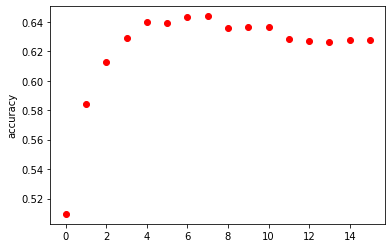

In [48]:
plt.plot(network_d_accuracy,'ro')
plt.ylabel('accuracy')
plt.show()

 - As we can see from above graph we are overfitting the model, as the accuracy on test data started decreasing
 - Hence we should stop at epoch = 7 with accuracy as  0.6437

# The best Model is the last model giving 64% accuracy in just 7 epoch